In [56]:
# Soccer Card PSA Pop report as of 30th March 2024

import pandas as pd

# Read the Excel file into a DataFrame
file_path = r'C:\Users\smorr\Desktop\2024 Projects\PSA pop\psa_pop_10_years_v1.xlsx'
df = pd.read_excel(file_path, header =1) # want to remove the first row

df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,1.5,2,3,4,5,6,7,8,9,10,Unnamed: 14
0,TOTAL POPULATION,2024,0,0,–,0,0,0,0,0,0,1,26,93,120
1,TOTAL POPULATION,2024,2,0,–,0,0,0,4,55,48,246,559,892,1806
2,TOTAL POPULATION,2023,65,0,–,0,2,16,31,146,259,1422,4732,7497,14170
3,TOTAL POPULATION,2023,561,0,–,9,12,48,147,671,1166,6020,23465,27279,59378
4,TOTAL POPULATION,2022,1247,2,–,18,66,183,620,2170,2609,12133,44271,50490,113809


In [58]:
# Rename specific columns
df = df.rename(columns={'Unnamed: 0': 'SET NAME', 'Unnamed: 1': 'YEAR', 'Unnamed: 2': 'AUTH', 'Unnamed: 14': 'TOTAL'})

df.head()

,SET NAME,YEAR,AUTH,1,1.5,2,3,4,5,6,7,8,9,10,TOTAL
0,TOTAL POPULATION,2024,0,0,–,0,0,0,0,0,0,1,26,93,120
1,TOTAL POPULATION,2024,2,0,–,0,0,0,4,55,48,246,559,892,1806
2,TOTAL POPULATION,2023,65,0,–,0,2,16,31,146,259,1422,4732,7497,14170
3,TOTAL POPULATION,2023,561,0,–,9,12,48,147,671,1166,6020,23465,27279,59378
4,TOTAL POPULATION,2022,1247,2,–,18,66,183,620,2170,2609,12133,44271,50490,113809


In [59]:
df = df.drop(columns=[1.5]) # column name is an int not a string hence no apostrophees 

df.head()

,SET NAME,YEAR,AUTH,1,2,3,4,5,6,7,8,9,10,TOTAL
0,TOTAL POPULATION,2024,0,0,0,0,0,0,0,0,1,26,93,120
1,TOTAL POPULATION,2024,2,0,0,0,0,4,55,48,246,559,892,1806
2,TOTAL POPULATION,2023,65,0,0,2,16,31,146,259,1422,4732,7497,14170
3,TOTAL POPULATION,2023,561,0,9,12,48,147,671,1166,6020,23465,27279,59378
4,TOTAL POPULATION,2022,1247,2,18,66,183,620,2170,2609,12133,44271,50490,113809


In [60]:
# Group by 'YEAR' and sum up the values in other columns
# because we are grouping on year it will remove the set column which isn't needed 
df_sum = df.groupby('YEAR').sum().reset_index()

# Sort by 'YEAR' from highest to lowest
df_sum = df_sum.sort_values(by='YEAR', ascending=False)

df_sum.head()

,YEAR,AUTH,1,2,3,4,5,6,7,8,9,10,TOTAL
9,2024,2,0,0,0,0,4,55,48,247,585,985,1926
8,2023,626,0,9,14,64,178,817,1425,7442,28197,34776,73548
7,2022,1753,4,23,88,264,859,2975,4128,19574,74850,85366,189884
6,2021,582,1,3,15,56,267,919,1605,7606,34632,42246,87932
5,2020,696,2,12,36,104,504,1617,2681,14388,68159,96685,184884


In [61]:
# Loop through columns 1 to 10
for col in range(1, 11):
    # Calculate the percentage of values in each column relative to the 'TOTAL' column for each year
    df_sum[f'{col}_PERCENTAGE'] = (df_sum[col] / df_sum['TOTAL']) * 100

# Round the percentages to two decimal places
df_sum = df_sum.round(2)

# Display the updated DataFrame
print(df_sum)


   YEAR  AUTH  1   2   3    4    5     6     7      8  ...  1_PERCENTAGE  \
9  2024     2  0   0   0    0    4    55    48    247  ...           0.0   
8  2023   626  0   9  14   64  178   817  1425   7442  ...           0.0   
7  2022  1753  4  23  88  264  859  2975  4128  19574  ...           0.0   
6  2021   582  1   3  15   56  267   919  1605   7606  ...           0.0   
5  2020   696  2  12  36  104  504  1617  2681  14388  ...           0.0   
4  2019   379  0   6  50  245  900  2200  2280   9216  ...           0.0   
3  2018   342  1  15  37  175  740  2061  2057  10666  ...           0.0   
2  2017   292  1  11  21   57  283   641   717   3218  ...           0.0   
1  2016   246  1   9  21   65  427   924  1364   5504  ...           0.0   
0  2015    86  0   5   8   28   87   290   573   2510  ...           0.0   

   2_PERCENTAGE  3_PERCENTAGE  4_PERCENTAGE  5_PERCENTAGE  6_PERCENTAGE  \
9          0.00          0.00          0.00          0.21          2.86   
8          0.

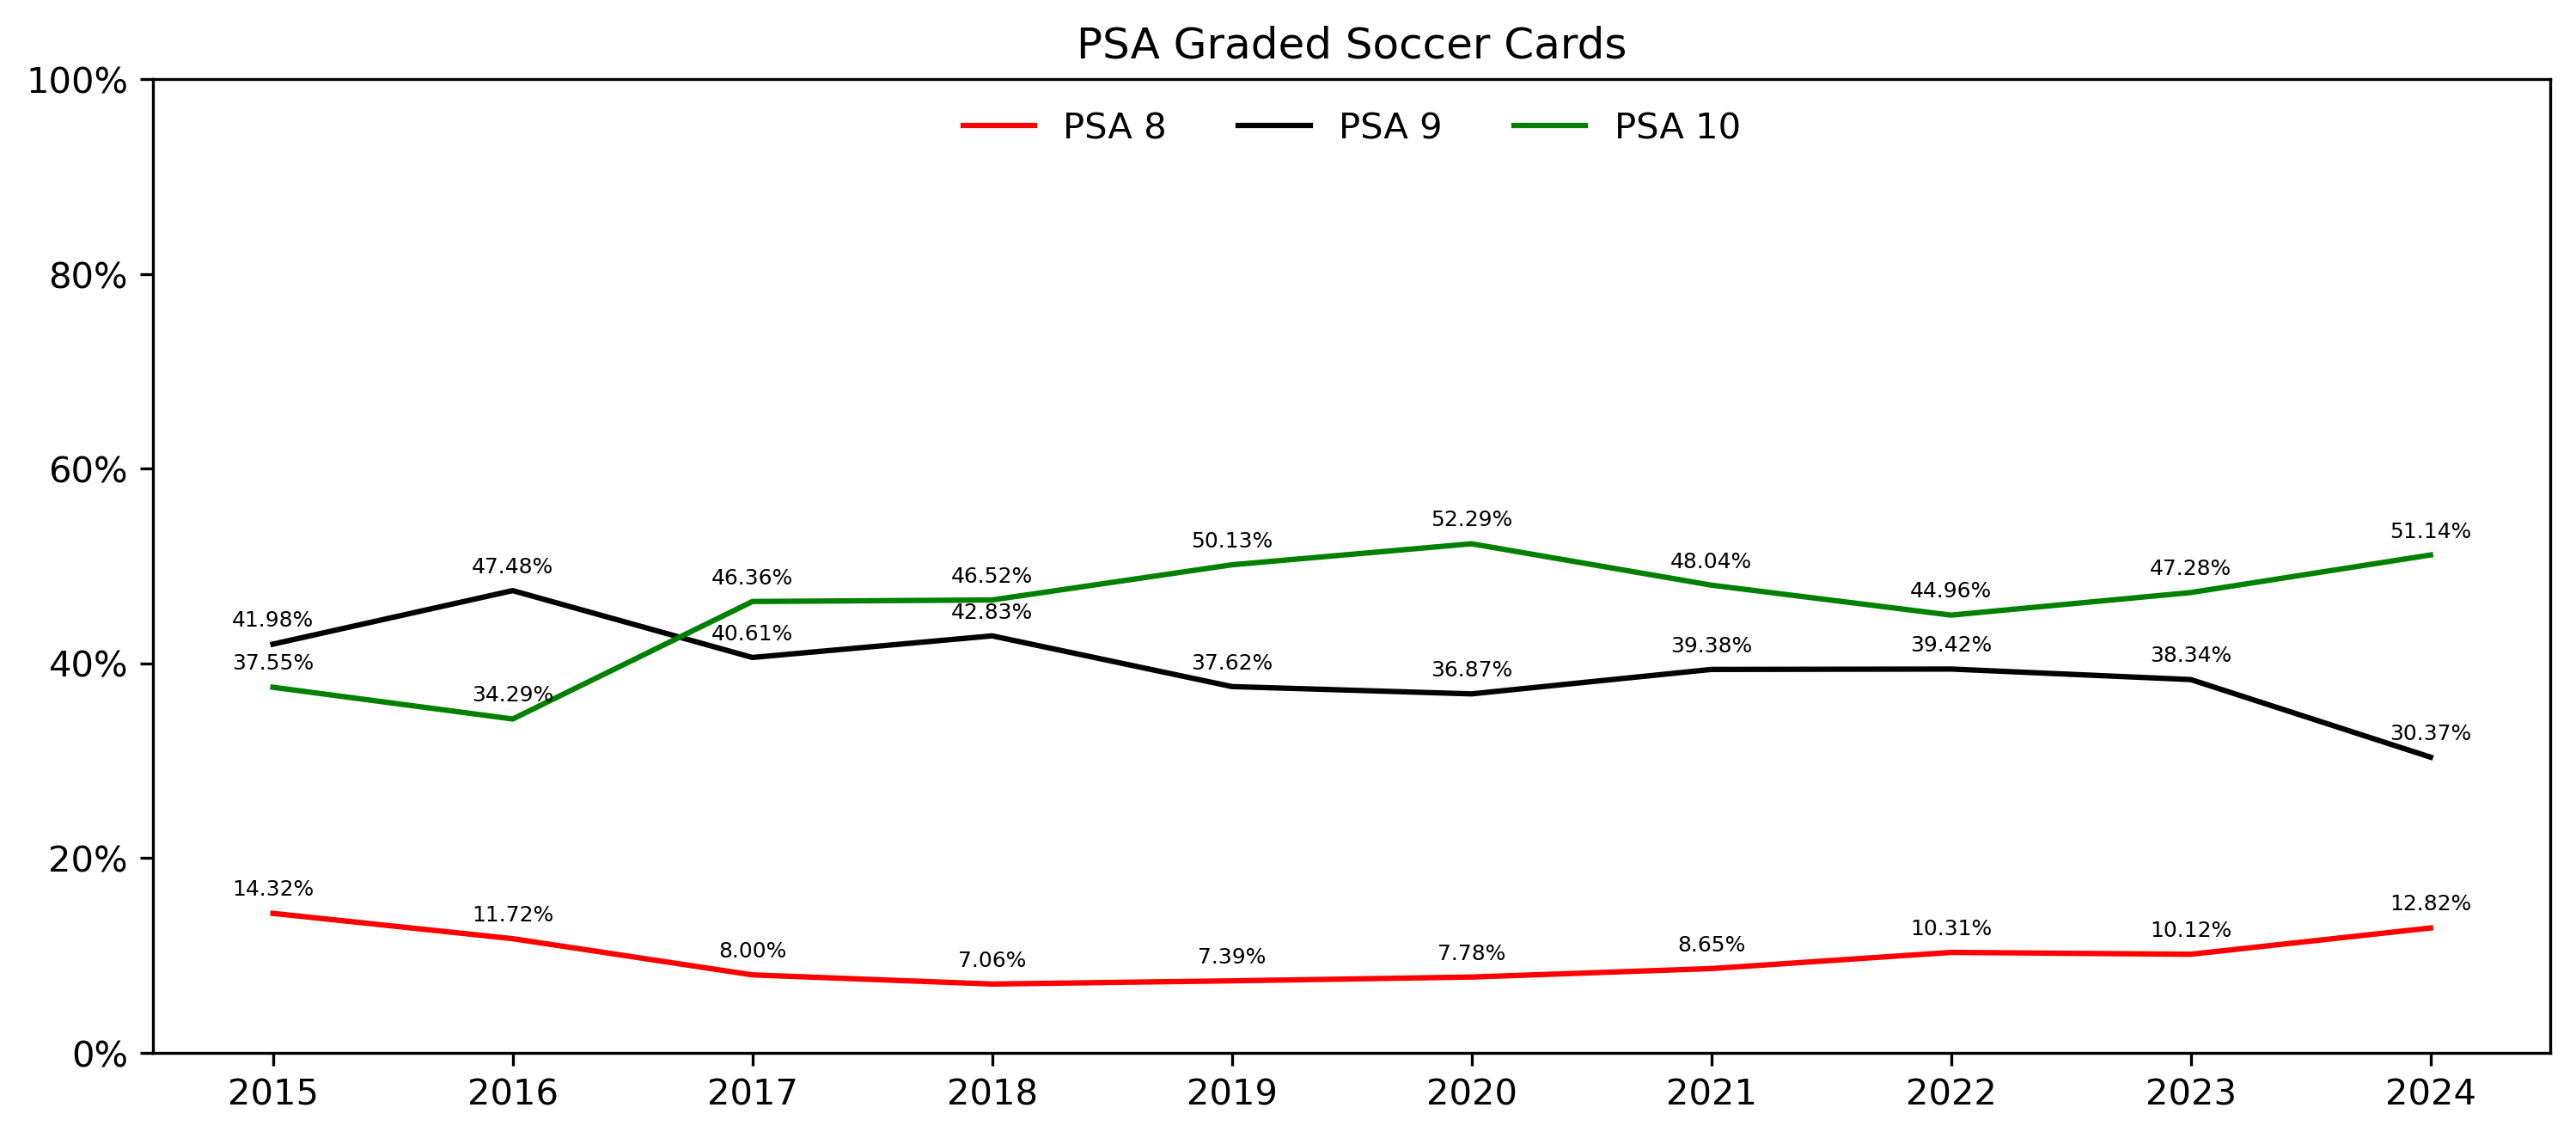

In [109]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Increase DPI for higher-definition chart
plt.figure(figsize=(12, 5), dpi=300)

# Sort the DataFrame by the 'YEAR' column
df_sum_sorted = df_sum.sort_values(by='YEAR')

# Define the columns to plot (from 1 to 10)
columns_to_plot = [f'{i}_PERCENTAGE' for i in range(8, 11)]

# Create a dictionary to map original labels to desired labels
label_mapping = {
    '8_PERCENTAGE': 'PSA 8',
    '9_PERCENTAGE': 'PSA 9',
    '10_PERCENTAGE': 'PSA 10'
}

# Define colors for each label
colors = {'PSA 8': 'red', 'PSA 9': 'black', 'PSA 10': 'green'}

# Plot each column separately with updated labels and colors
for column in columns_to_plot:
    label = label_mapping.get(column, column)
    color = colors.get(label, 'blue')  # Default to blue if color not specified
    plt.plot(df_sum_sorted['YEAR'], df_sum_sorted[column], label=label, color=color)
    
    # Annotate each line with percentage values
    for i, txt in enumerate(df_sum_sorted[column]):
        plt.annotate(f'{txt:.2f}%', (df_sum_sorted['YEAR'][i], df_sum_sorted[column][i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=6)

# Add labels and title
plt.title('PSA Graded Soccer Cards')

# Customize the appearance of the x-axis ticks to display the year dates
plt.xticks(df_sum_sorted['YEAR'])  # Set x-axis ticks to the years in the 'YEAR' column

# Customize the appearance of the x-axis ticks to display the year dates with % symbol
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Set x-axis limits with padding to prevent annotations from crossing over the border
x_min = df_sum_sorted['YEAR'].min() - 0.5
x_max = df_sum_sorted['YEAR'].max() + 0.5
plt.xlim(x_min, x_max)
plt.ylim(0, 100)  # Set y-axis limits to range from 0% to 100%

# Add legend to the top of the chart and centered
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(columns_to_plot), frameon=False)

# Show the plot
plt.show()

In [ ]:
# Why grading modern soccer cards is generally pointless 


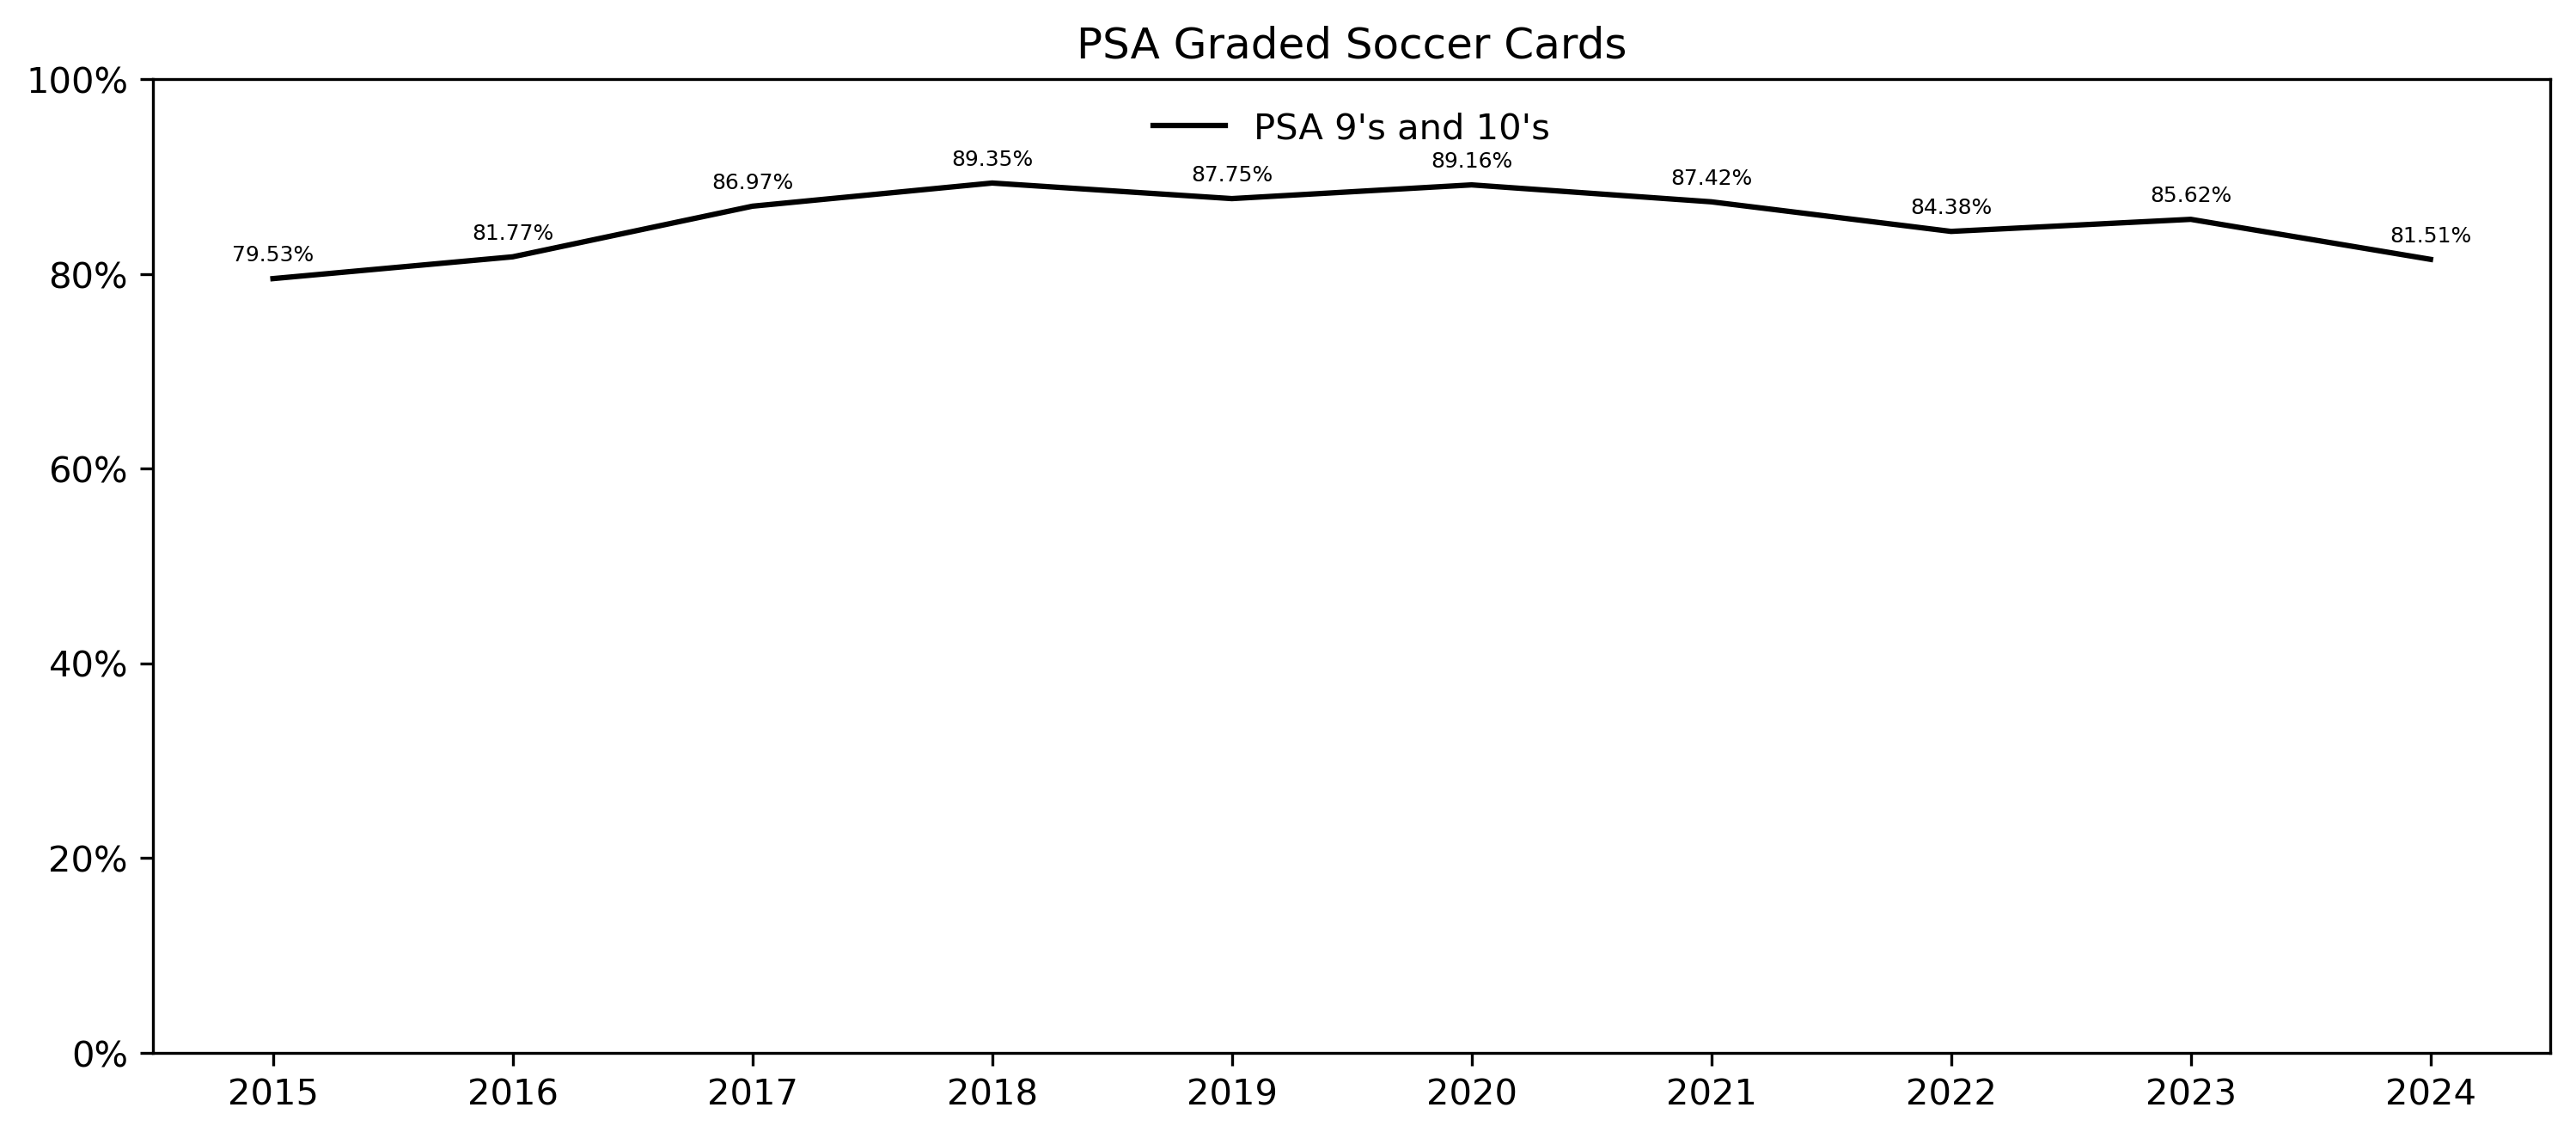

In [106]:
# Increase DPI for higher-definition chart
plt.figure(figsize=(12, 5), dpi=300)

# Sort the DataFrame by the 'YEAR' column
df_sum_sorted = df_sum.sort_values(by='YEAR')

# Calculate the sum of percentages for columns 9 and 10
df_sum_sorted['9_10_SUM_PERCENTAGE'] = df_sum_sorted['9_PERCENTAGE'] + df_sum_sorted['10_PERCENTAGE']

# Define the columns to plot (from 1 to 10)
columns_to_plot = ['9_10_SUM_PERCENTAGE']

# Create a dictionary to map original labels to desired labels
label_mapping = {
    '9_10_SUM_PERCENTAGE': "PSA 9's and 10's"
}

# Plot each column separately with updated labels and colors
for column in columns_to_plot:
    label = label_mapping.get(column, column)
    color = colors.get(label, 'black')  # Default to blue if color not specified
    plt.plot(df_sum_sorted['YEAR'], df_sum_sorted[column], label=label, color=color)
    
    # Annotate each line with percentage values
    for i, txt in enumerate(df_sum_sorted[column]):
        plt.annotate(f'{txt:.2f}%', (df_sum_sorted['YEAR'][i], df_sum_sorted[column][i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=6)

# Add labels and title
plt.title('PSA Graded Soccer Cards')

# Customize the appearance of the x-axis ticks to display the year dates
plt.xticks(df_sum_sorted['YEAR'])  # Set x-axis ticks to the years in the 'YEAR' column

# Customize the appearance of the x-axis ticks to display the year dates with % symbol
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Set x-axis limits with padding to prevent annotations from crossing over the border
x_min = df_sum_sorted['YEAR'].min() - 0.5
x_max = df_sum_sorted['YEAR'].max() + 0.5
plt.xlim(x_min, x_max)
plt.ylim(0, 100)  # Set y-axis limits to range from 0% to 100%

# Add legend to the top of the chart and centered
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(columns_to_plot), frameon=False)

# Show the plot
plt.show()


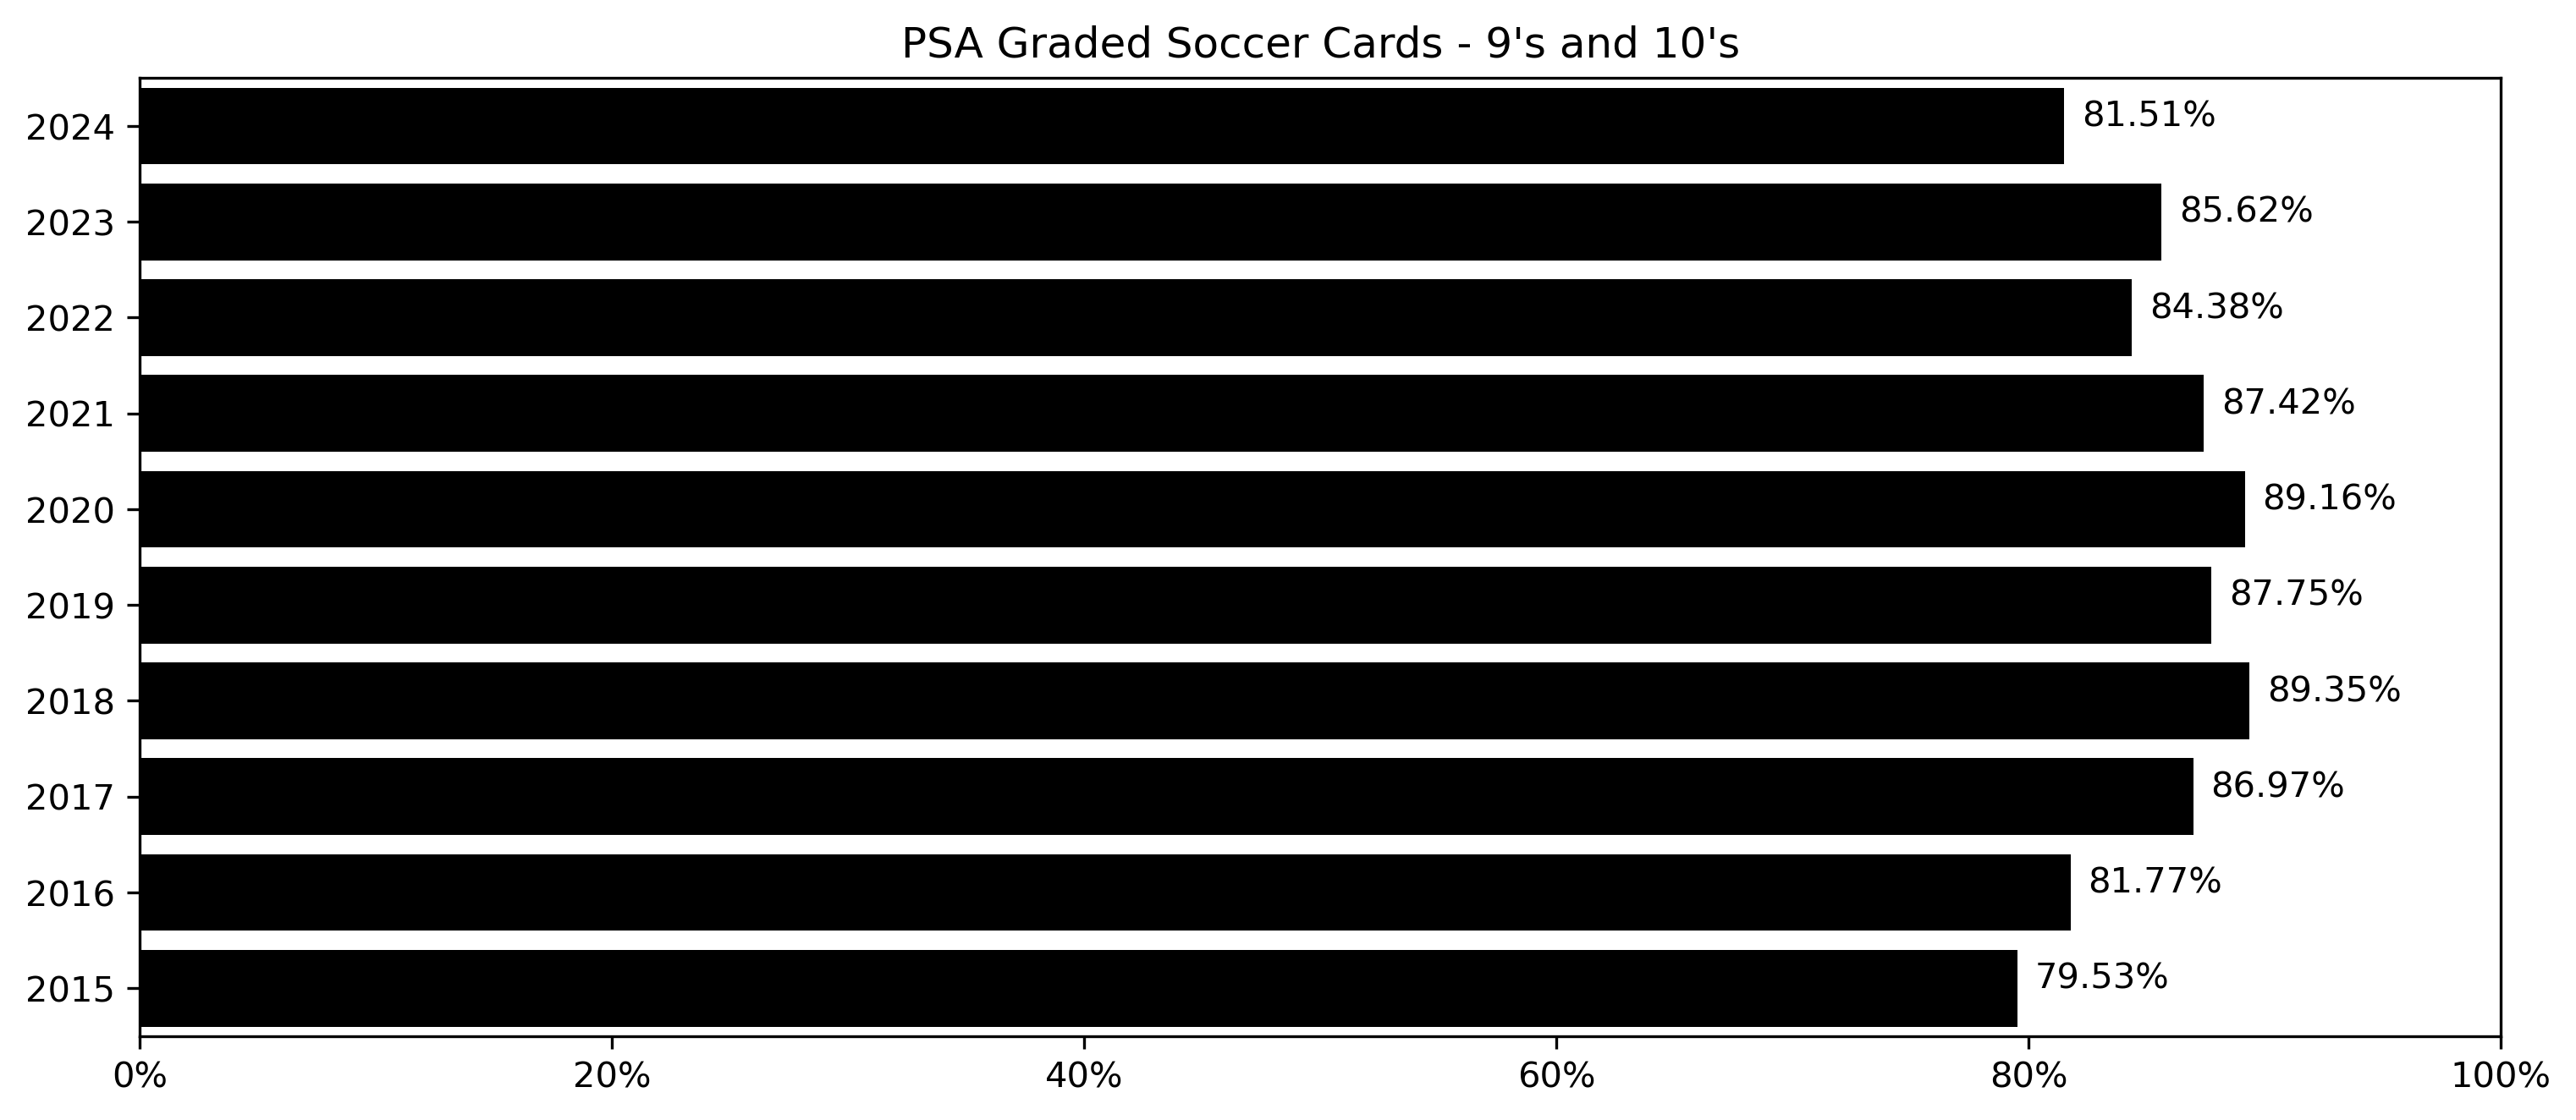

In [117]:
# horizontal bar chart 

# Increase DPI for higher-definition chart
plt.figure(figsize=(12, 5), dpi=300)

# Sort the DataFrame by the 'YEAR' column
df_sum_sorted = df_sum.sort_values(by='YEAR')

# Calculate the sum of percentages for columns 9 and 10
df_sum_sorted['9_10_SUM_PERCENTAGE'] = df_sum_sorted['9_PERCENTAGE'] + df_sum_sorted['10_PERCENTAGE']

# Define the columns to plot (from 1 to 10)
columns_to_plot = ['9_10_SUM_PERCENTAGE']

# Create a dictionary to map original labels to desired labels
label_mapping = {
    '9_10_SUM_PERCENTAGE': "PSA 9's and 10's"
}

# Plot each column separately with updated labels and colors
for column in columns_to_plot:
    label = label_mapping.get(column, column)
    color = colors.get(label, 'black')  # Default to black if color not specified
    
    # Plot horizontal bar chart
    plt.barh(df_sum_sorted['YEAR'], df_sum_sorted[column], label=label, color=color)
    
    # Annotate each bar with percentage values at the end
    for i, txt in enumerate(df_sum_sorted[column]):
        plt.annotate(f'{txt:.2f}%', (txt, df_sum_sorted['YEAR'][i]), 
                     textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10)

# Add labels and title
plt.title("PSA Graded Soccer Cards - 9's and 10's")

# Customize the appearance of the y-axis ticks to display the year dates
plt.yticks(df_sum_sorted['YEAR'])  # Set y-axis ticks to the years in the 'YEAR' column

# Customize the appearance of the x-axis ticks to display the percentage values with % symbol
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Set y-axis limits with padding to prevent annotations from crossing over the border
y_min = df_sum_sorted['YEAR'].min() - 0.5
y_max = df_sum_sorted['YEAR'].max() + 0.5
plt.ylim(y_min, y_max)
plt.xlim(0, 100)  # Set x-axis limits to range from 0% to 100%

# Add legend to the top of the chart and centered
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(columns_to_plot), frameon=False)

# Show the plot
plt.show()
